In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

## Ejemplo 10.1 Curva de Phillips estática (phillips.dta)

In [2]:
dfej10_1 = pd.read_stata('phillips.dta')
dfej10_1.head()

,year,unem,inf,unem_1,inf_1,unem_2,inf_2,cunem,cinf,cunem_1,cinf_1
0,1948,3.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1949,5.9,-1.2,3.8,8.1,NaN,NaN,2.1,-9.3,NaN,NaN
2,1950,5.3,1.3,5.9,-1.2,3.8,8.1,-0.6,2.5,2.1,-9.3
3,1951,3.3,7.9,5.3,1.3,5.9,-1.2,-2.0,6.6,-0.6,2.5
4,1952,3.0,1.9,3.3,7.9,5.3,1.3,-0.3,-6.0,-2.0,6.6


In [12]:
# Creo la serie, para no cambiar el nombre a la base, y porque la regresión no permite el nombre "inf", por ser un código 
# en patsy
inflation = dfej10_1.inf

In [11]:
regdfej10_1 = smf.ols('inflation ~  unem ', data = dfej10_1).fit()
print(regdfej10_1.summary())

                            OLS Regression Results                            
Dep. Variable:              inflation   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.616
Date:                Wed, 15 Jul 2020   Prob (F-statistic):              0.112
Time:                        18:57:19   Log-Likelihood:                -124.43
No. Observations:                  49   AIC:                             252.9
Df Residuals:                      47   BIC:                             256.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4236      1.719      0.828      0.4

In [ ]:
# Comentarios : No sugiere el trade oof pues el signo de unem es positivo. Igualmente el p-value no es bueno
# El problema es que no se cumplen los supuestos del MCO. Veremos en Ejemplo 12.1 que hay autocorrelación, que invalidan los 
# los errores estándar y los t
# Además desde la teoría el modelo se critica con el modelo aumentado con expectativas

## Ejemplo 10.2 Efectos de la inflación y los déficits sobre los tipos de intcrés (intdef.dta)

In [13]:
dfej10_2 = pd.read_stata('intdef.dta')
dfej10_2.head()

,year,i3,inf,rec,out,def,i3_1,inf_1,def_1,ci3,cinf,cdef,y77
0,1948,1.04,8.1,16.4,11.7,-4.700000,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1949,1.10,-1.2,14.6,14.4,-0.200001,1.04,8.1,-4.700000,0.06,-9.3,4.499999,0
2,1950,1.22,1.3,14.5,15.6,1.100000,1.10,-1.2,-0.200001,0.12,2.5,1.300001,0
3,1951,1.55,7.9,16.1,14.2,-1.900001,1.22,1.3,1.100000,0.33,6.6,-3.000001,0
4,1952,1.77,1.9,18.9,19.4,0.500000,1.55,7.9,-1.900001,0.22,-6.0,2.400001,0


In [16]:
# Cambiamos el nombre pues patsy no admite
inflation = dfej10_2.inf

In [21]:
# Cambiamos el nombre pues patsy no admite , pero aún aca no puede usarse con .def
deficit = dfej10_2['def']

In [22]:
regdfej10_2 = smf.ols('i3 ~  inflation + deficit ', data = dfej10_2).fit()
print(regdfej10_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     i3   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     52.78
Date:                Wed, 15 Jul 2020   Prob (F-statistic):           1.23e-12
Time:                        20:15:34   Log-Likelihood:                -93.079
No. Observations:                  49   AIC:                             192.2
Df Residuals:                      46   BIC:                             197.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2520      0.442      2.835      0.0

In [ ]:
# Comentarios: Tanto inflación com odéficit, generan efecto positivo en el tipo de interés. Los coeficientes son significtivos
# suponiendo que se cumplen los supuestos MCO

## Ejemplo 10.3 Empleo y salario mínimo en Puerto Rico (prminwge.dta)

In [16]:
dfej10_3 = pd.read_stata('prminwge.dta')
dfej10_3.head()

,year,avgmin,avgwage,kaitz,avgcov,covt,mfgwage,prdef,prepop,prepopf,...,lprunemp,lprgnp,lusgnp,lkaitz,lprun_1,lprepop,lprep_1,mincov,lmincov,lavgmin
0,1950,0.198,0.398,0.155,0.201,0.29,0.43,0.859,0.470,0.470,...,2.734367,6.778443,7.093155,-1.864330,NaN,-0.755023,NaN,0.099995,-2.302635,-1.619488
1,1951,0.209,0.410,0.164,0.207,0.29,0.45,0.881,0.449,0.449,...,2.772589,6.829794,7.191580,-1.807889,-1.870803,-0.800732,-0.755023,0.105520,-2.248859,-1.565421
2,1952,0.225,0.421,0.180,0.226,0.29,0.48,0.953,0.434,0.434,...,2.694627,6.923530,7.229839,-1.714798,-1.832582,-0.834711,-0.800732,0.120784,-2.113753,-1.491655
3,1953,0.311,0.480,0.229,0.231,0.29,0.50,0.970,0.428,0.428,...,2.674149,6.985919,7.269129,-1.474033,-1.910543,-0.848632,-0.834711,0.149669,-1.899331,-1.167962
4,1954,0.313,0.508,0.211,0.224,0.29,0.52,1.000,0.415,0.415,...,2.727853,7.007058,7.255733,-1.555897,-1.931022,-0.879477,-0.848632,0.138016,-1.980387,-1.161552


In [28]:
regdfej10_3 = smf.ols('np.log(prepop) ~  np.log(mincov) + np.log(usgnp) ', data = dfej10_3).fit()
print(regdfej10_3.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(prepop)   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     34.04
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           6.17e-09
Time:                        13:45:44   Log-Likelihood:                 57.376
No. Observations:                  38   AIC:                            -108.8
Df Residuals:                      35   BIC:                            -103.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.0544      0.765     -1.

In [ ]:
# Comentario: El logaritmo es muy usado para series de tiempo pues la pendiente muestra el crecimiento
# En una regresión, log-log, el coeficiente es la elasticidad
# La elasticidad de la tasa de empleo (prepop) respecto al índice relativo de salario mínimo (mincov) es 2.154 y significativa
# El producto no es significtivo, pero esto cambiará al incorporar luego la tendencia

## Ejemplo 10.4 Efectos de las exenclones fiscales sobre las tasas de fertilidad (fertil3.dta)

In [2]:
dfej10_4 = pd.read_stata('fertil3.dta')
dfej10_4.head()

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
0,124.699997,0.00,1913,1,1,NaN,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126.599998,0.00,1914,2,4,0.0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,124.699997,NaN,NaN,NaN,NaN,NaN
2,125.000000,0.00,1915,3,9,0.0,0.0,NaN,NaN,0,...,0.0,NaN,NaN,NaN,126.599998,1.900002,NaN,NaN,NaN,124.699997
3,123.400002,0.00,1916,4,16,0.0,0.0,0.0,NaN,0,...,0.0,0.0,NaN,NaN,125.000000,-1.599998,1.900002,NaN,NaN,126.599998
4,121.000000,19.27,1917,5,25,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,NaN,123.400002,-1.599998,-1.599998,1.900002,NaN,125.000000


In [3]:
regdfej10_4 = smf.ols('gfr ~  pe + ww2 + pill ', data = dfej10_4).fit()
print(regdfej10_4.summary())

c:\python\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     20.38
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.57e-09
Time:                        11:29:24   Log-Likelihood:                -293.56
No. Observations:                  72   AIC:                             595.1
Df Residuals:                      68   BIC:                             604.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     98.6818      3.208     30.760      0.0

In [5]:
dfej10_4[['gfr', 'pe']].describe()

,gfr,pe
count,72.000000,72.000000
mean,95.631943,100.401527
std,19.804644,65.875633
min,65.400002,0.000000
25%,78.275000,31.957500
50%,94.050003,121.220001
75%,113.450003,151.912495
max,126.599998,243.830002


In [ ]:
# Comentarios : gfr es el número de nacimientos cada 1000 mujeres y pe es el monto de excensión impuesto personal
# Se puede agregar dummies para aislar períodos específicos. En este caso ww2 es el período de la Segunda Guerra
# El otro caso es pill que señala el momento de la disponibilidad de la pildora antocinceptiva hasta el presente
# TOdas son significativas 
# La tasa de fertilidad fue menor durante la segunda guerra, ceteris paribus. 24 nacimientos menos cada 1000 mujeres
# La tasa de fertilidad fue menor con la introducción de la píldora. 31 nacimientos menos cada 1000 mujeres
# Si se aumenta en 1.2 $ la excensión de impuestos (pe), se aumenta en 1 hijo cada 1000 mujeres

In [ ]:
# Es posible que la fertilidad reaccione con retardo al cambio en las excensiones impositivas? 

In [11]:
regdfej10_4a = smf.ols('gfr ~  pe +pe.shift(1) + pe.shift(2)+ ww2 + pill ', data = dfej10_4).fit()
print(regdfej10_4a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     12.73
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           1.35e-08
Time:                        18:29:36   Log-Likelihood:                -282.26
No. Observations:                  70   AIC:                             576.5
Df Residuals:                      64   BIC:                             590.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      95.8705      3.282     29.211      

In [ ]:
# Comentarios : El uso de los rezagos distribuidos, hace que se pierda significatividad en los coeficientes de (pe). La alta 
# correlación entre pe y sus rezagos, genera multicolinealidad ( ello hace que aumente mucho sus errores estándar, llegando 
# a ser más grandes que el coeficiente) y ello hace que se vuelvan no significativos individualmente

In [ ]:
# Pero si testeamos la significatividad conjunta de pe y sus rezagos

In [16]:
# Test F :  H0: todos los pe tienen coeficientes = 0 :
hipot = ['pe = 0', 'pe.shift(1)= 0', 'pe.shift(2) = 0']
ftest = regdfej10_4a.f_test(hipot)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

fstat: 3.972964046978444

fpval: 0.011652005303127788



In [ ]:
# Comentario : Es decir, pe tiene efecto en gfr pero no sabemos si es contemporáneo o rezagado, pues no hay estimación individual
# adecuada 

In [ ]:
# Podemos ver si el efecto está en los rezagos

In [17]:
# Test F :  H0: todos los pe rezagados tienen coeficientes = 0 :
hipot1 = ['pe.shift(1)= 0', 'pe.shift(2) = 0']
ftest1 = regdfej10_4a.f_test(hipot1)
fstat1 = ftest1.statistic[0][0]
fpval1 = ftest1.pvalue
print(f'fstat1: {fstat1}\n')
print(f'fpval1: {fpval1}\n')

fstat1: 0.05343034560693407

fpval1: 0.9480142085486636



In [ ]:
# Comentario : Se acepta la H0 por lo que son conjuntamente no significativos los rezagos, quedando justificado el modelo 
# estático

In [ ]:
# Pero podemos estimar el Efecto de Largo Plazo 

In [ ]:
# La propensión a largo plazo de la regresión con rezagos distribuidos es 

In [18]:
regdfej10_4a.params[1]+regdfej10_4a.params[2]+regdfej10_4a.params[3]

0.10071909027975462

In [ ]:
# Pero con esa regresión no tenemos error estándar

$$Sea~la ~propensión~a ~ largo  ~~~~    \theta_{0} = \delta_{0}+ \delta_{1}+ \delta_{2}$$

$$ Despejamos~ \delta_{0}= \theta_{0}-\delta_{1}- \delta_{2}  $$

$$Sustituimos~~~ gfr_{t}=\alpha_{0}+(\theta_{0}-\delta_{1}-\delta_{2})~pe_{t}+\delta_{1}) ~pe_{t-1} +\delta_{2}) ~pe_{t-2}+... $$

$$gfr_{t}=\alpha_{0}+\theta_{0}~pe_{t}+\delta_{1}) ~(pe_{t-1}-pe_{t-}) +\delta_{2}) ~(pe_{t-2}-pe_{t-1})+... $$

In [ ]:
# Entonces el coeficiente de pe será la propensión a largo plazo y el error estándar correspondiente

In [19]:
regdfej10_4b = smf.ols('gfr ~  pe +pe.diff(1) + pe.diff(2)+ ww2 + pill ', data = dfej10_4).fit()
print(regdfej10_4b.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     12.73
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           1.35e-08
Time:                        19:53:54   Log-Likelihood:                -282.26
No. Observations:                  70   AIC:                             576.5
Df Residuals:                      64   BIC:                             590.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     95.8705      3.282     29.211      0.0

In [ ]:
# Como ya vimos, la propensión a largo es 0.101 , con error estándar de 0.030 y t de 3.38, muy significativo
# Entonces a pesar de la no significatividad individual de pe y sus rezagos, la propensión a largo si lo es
# El intervalo de confianza de esa propensión a largo es [0.041, 0.160]

In [ ]:
# Un Estudio de Acontecimiento con índices

In [ ]:
# ¿Eran las importaciones anormalmente elevadas previo a la demanda por dumping contra China?
# ¿cambiaron las importaciones de manera notable tras la demanda antidumping? 
# ¿cuál fue la reducción en las importaciones después de la decisión a favor de la industria americana?

## Ejemplo 10.5 Demandas antidumping e importaciones químicas (barium.dta)

In [60]:
dfej10_5 = pd.read_stata('barium.dta')
dfej10_5.head()

,chnimp,bchlimp,befile6,affile6,afdec6,befile12,affile12,afdec12,chempi,gas,...,apr,may,jun,jul,aug,sep,oct,nov,dec,percchn
0,220.462006,9578.375977,0,0,0,0,0,0,100.099998,7.830000e+09,...,0,0,0,0,0,0,0,0,0,2.301664
1,94.797997,11219.480469,0,0,0,0,0,0,100.900002,8.820000e+09,...,0,0,0,0,0,0,0,0,0,0.844941
2,219.357498,9719.900391,0,0,0,0,0,0,101.099998,8.450000e+09,...,1,0,0,0,0,0,0,0,0,2.256788
3,317.421509,12920.950195,0,0,0,0,0,0,102.500000,9.240001e+09,...,0,1,0,0,0,0,0,0,0,2.456642
4,114.639000,9790.446289,0,0,0,0,0,0,104.099998,9.150000e+09,...,0,0,1,0,0,0,0,0,0,1.170927


In [ ]:
# Se explican las importaciones chinas (chinimp), agregando 3 dummies
# befile6 = 1 para los 6 meses antes de la demanda 
# affile6 = 1 para los 6 meses luego de la demanda
# afdec6 =  1 para los 6 meses luego de la resolución positiva

In [ ]:
# chempi = índice de producción de industria química, base 100 junio 1977
# gas = volúmen producción gasolina
# rtwex = índice de tipo de cambio

In [23]:
regdfej10_5 = smf.ols('np.log(chnimp) ~  np.log(chempi) + np.log(gas) + np.log(rtwex) + befile6 + affile6 + afdec6 ', data = dfej10_5).fit()
print(regdfej10_5.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(chnimp)   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     9.064
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           3.25e-08
Time:                        23:21:01   Log-Likelihood:                -114.79
No. Observations:                 131   AIC:                             243.6
Df Residuals:                     124   BIC:                             263.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.8030     21.045     -0.

In [ ]:
# Comentarios : befile6 no significativa implica que las importaciones Chinas no eran altas previo a la demanda
# affile6 es significativa, negativa, pero de bajo valor el coeficiente, indicando una bajada de 3.2% de las importaciones
# pero coeficiente no significativo
# afdec6 indica gran reducción de importaciones luego de resolución positiva, y el coeficiente es significativo 

In [ ]:
# Como la dependiente está en log, se obtiene el valor en %

In [25]:
np.exp(regdfej10_5.params[6])-1

-0.43177908332605097

In [ ]:
# Los signos de las variablesc ontrol son los esperados:
# un aumento # en la producción del sector químico (chempi) aumenta la demanda (3.12). 
# La producción de gasolina no afecta las importaciones chinas de manera significativa. p-value 0.829
# Un incremento en el valor del dólar respecto a otras monedas aumenta la demanda de importaciones chinas como predice 
# la teorías, siendo la elasticidad estadísticamente cerca de uno. ¿Por qué?)

In [ ]:
# Inclusión de dummies de interacción

## Ejemplo 10.6 Resultados de las elecciones y resultados económicos (fair.dta)

In [2]:
dfej10_6 = pd.read_stata('fair.dta')
dfej10_6.head()

,year,V,I,DPER,DUR,g3,p15,n,g2,gYR,...,Ig3,Ip151md,In1md,demvote,incum,gnews,inf,partyWH,pWHgnews,pWHinf
0,1916,0.5168,1,1,0.00,2.229,4.252,3,-1.213000,6.035,...,2.229,4.252,3,0.5168,1,3,4.252,1,3,4.252
1,1920,0.3612,1,0,1.00,-11.463,16.535,5,-14.496000,-8.147,...,-11.463,0.000,0,0.3612,0,5,16.535,1,5,16.535
2,1924,0.4176,-1,-1,0.00,-3.872,5.161,10,-9.777000,-1.009,...,3.872,-5.161,-10,0.4176,-1,10,5.161,-1,-10,-5.161
3,1928,0.4118,-1,0,-1.00,4.623,0.183,7,6.043000,-0.225,...,-4.623,-0.183,-7,0.4118,0,7,0.183,-1,-7,-0.183
4,1932,0.5916,-1,-1,-1.25,-15.574,6.657,3,-16.249001,-14.369,...,15.574,-6.657,-3,0.5916,-1,3,6.657,-1,-3,-6.657


In [42]:
len(dfej10_6)

21

In [36]:
dfej10_6['partyWH'] = dfej10_6['partyWH'].astype(float)

In [37]:
dfej10_6['incum'] = dfej10_6['incum'].astype(float)

In [38]:
dfej10_6['gnews'] = dfej10_6['gnews'].astype(float)

In [39]:
pargne = dfej10_6['partyWH']*dfej10_6['gnews']

In [40]:
parinf = dfej10_6['partyWH']*dfej10_6['inf']

In [ ]:
# La proporción de votos al demócrata ( demvote) en función de si un demócrata está en la casa blanca, con la dummy de 
# 1 y -1 en caso que esté un republicano (partyWH). Con (incum), otra dummy 1 si es elegido el demócrata y -1 si es elegido 
# el republicano 
# La variable gnews es el número de los primeros 15 trimestres del gobierno que el pbi crece más que 2.9%
# La variable inf es la tasas de inflación de los primeros 15 trimestres

In [ ]:
# Las dos variables de interacción
# pargne = partyWH * gnews , sería las buenas noticias del gobierno en ejercicio
# parinf = partyWH * inf , sería las malas noticias del gobierno en ejercicio ( se espera signo negativo)
# 

In [41]:
regdfej10_6 = smf.ols('demvote ~  partyWH + incum + pargne + parinf ', data = dfej10_6).fit()
print(regdfej10_6.summary())

                            OLS Regression Results                            
Dep. Variable:                demvote   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     7.725
Date:                Wed, 15 Jul 2020   Prob (F-statistic):            0.00115
Time:                        20:46:29   Log-Likelihood:                 36.393
No. Observations:                  21   AIC:                            -62.79
Df Residuals:                      16   BIC:                            -57.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4842      0.011     42.210      0.0

In [ ]:
# Comentarios : Todas , salvo partyWH son significativas
# La variable incum, implica que 5.4% del voto (demvote), es porque el partido está en el gobierno
# pargne indica que un trimestre adicional de buenas noticias, da 1.1 % adicional a (demvote)
# La inflación tiene efecto negativo. Si por ejeplo la inflación es 2% mayor, se pierde casi 1.5% en (demvote)

In [ ]:
# Modelos de regresión  con tendencia temporal

In [ ]:
# Regresión espuria por omisión de t

## Ejemplo 10.7 Inversión y precios de la vivienda (hseinv.dta)

In [2]:
dfej10_7 = pd.read_stata('hseinv.dta')
dfej10_7.head()

,year,inv,pop,price,linv,lpop,lprice,t,invpc,linvpc,lprice_1,linvpc_1,gprice,ginvpc
0,1947,54864.0,144126.0,0.8190,10.912613,11.878443,-0.199671,1,0.380667,-0.965831,NaN,NaN,NaN,NaN
1,1948,64717.0,146631.0,0.8649,11.077779,11.895675,-0.145141,2,0.441360,-0.817895,-0.199671,-0.965831,0.054530,0.147935
2,1949,63150.0,149188.0,0.8456,11.053268,11.912963,-0.167709,3,0.423291,-0.859694,-0.145141,-0.817895,-0.022567,-0.041799
3,1950,86014.0,151684.0,0.8765,11.362266,11.929555,-0.131819,4,0.567060,-0.567289,-0.167709,-0.859694,0.035890,0.292405
4,1951,70610.0,154287.0,0.8819,11.164927,11.946569,-0.125677,5,0.457654,-0.781643,-0.131819,-0.567289,0.006142,-0.214353


In [5]:
regdfej10_7 = smf.ols('np.log(invpc) ~  np.log(price)  ', data = dfej10_7).fit()
print(regdfej10_7.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(invpc)   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     10.53
Date:                Wed, 22 Jul 2020   Prob (F-statistic):            0.00238
Time:                        23:57:57   Log-Likelihood:                 19.617
No. Observations:                  42   AIC:                            -35.23
Df Residuals:                      40   BIC:                            -31.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5502      0.043    -12.788

In [ ]:
# Comentario : Interpretable como una curva de oferta, la elasticiadad precio está alrededor de 1, (1.2409) y significativa
# Pero las dos series tienen tendencia

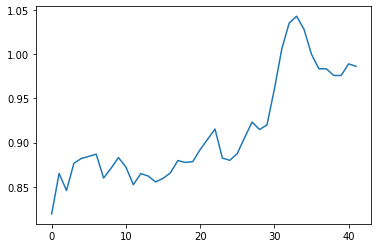

In [4]:
#dfej10_7.invpc.plot()
dfej10_7.price.plot()

In [38]:
regdfej10_7a = smf.ols('np.log(invpc) ~  t  ', data = dfej10_7).fit()
print(regdfej10_7a.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(invpc)   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     20.19
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           5.85e-05
Time:                        16:04:58   Log-Likelihood:                 23.290
No. Observations:                  42   AIC:                            -42.58
Df Residuals:                      40   BIC:                            -39.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8413      0.045    -18.802      0.0

In [10]:
regdfej10_7b = smf.ols('np.log(price) ~  t  ', data = dfej10_7).fit()
print(regdfej10_7b.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     107.6
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           6.68e-13
Time:                        00:01:33   Log-Likelihood:                 84.124
No. Observations:                  42   AIC:                            -164.2
Df Residuals:                      40   BIC:                            -160.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1884      0.011    -17.921      0.0

In [ ]:
# Comentarios : En ambos casos , la pendiente es positiva, y aún cuando los errores estándar no son muy confiables en estas
# regrsiones por la autocorrelación, son significtivos los coeficientes. Entonces para tener en cuenta la stendencias
# pondremos t en la regresión original

In [36]:
regdfej10_7c = smf.ols('np.log(invpc) ~  np.log(price) + t  ', data = dfej10_7).fit()
print(regdfej10_7c.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(invpc)   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     10.08
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           0.000296
Time:                        16:03:01   Log-Likelihood:                 23.459
No. Observations:                  42   AIC:                            -40.92
Df Residuals:                      39   BIC:                            -35.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.9131      0.136     -6.733

In [ ]:
# Comentarios : Ahora la elasticidad es negativa y no significativa
# La tendencia si es significativa, con 1% de crecimiento promedio en (invpc)
# Con esto no podemos decir que la inversión está influcida por el precio . Hay otros factores captados por la tendencia
# La regresión anterior , era espuria por tener la dependiente y la xt , tendencias ambas crecientes

## Ejemplo 10.8 Ecuación de fertilidad* (fertil3.dta)

In [ ]:
# Se agrega una tendencia en la regresión del Ejemplo 10.4 donde la dependiente tiene tendencia que baja y la independiente sube

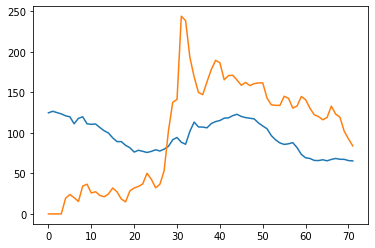

In [5]:
dfej10_4.gfr.plot()
dfej10_4.pe.plot()

In [4]:
regdfej10_8 = smf.ols('gfr ~  pe + ww2 + pill + t', data = dfej10_4).fit()
print(regdfej10_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     32.84
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           3.76e-15
Time:                        11:29:44   Log-Likelihood:                -277.57
No. Observations:                  72   AIC:                             565.1
Df Residuals:                      67   BIC:                             576.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.7694      3.358     33.287      0.0

In [ ]:
# Conparando los dos coeficientes de pe

In [6]:
regdfej10_4.params[1]

0.08254001502481081

In [8]:
regdfej10_4.bse[1]

0.02964623036027761

In [7]:
regdfej10_8.params[1]

0.2788778035352557

In [9]:
regdfej10_8.bse[1]

0.04001986409849263

In [ ]:
# Se a triplicado el valor del coeficiente de pe y es más significativo
# Pero pill pierde significatividad

In [ ]:
# Como gfr tiene ascensos y descensos podemos analizar la robustez del efecto de pe en la estimación 
# probando tendencia cuadrática

In [12]:
regdfej10_8a = smf.ols('gfr ~  pe + ww2 + pill + t + tsq', data = dfej10_4).fit()
print(regdfej10_8a.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     35.09
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           2.44e-17
Time:                        11:48:55   Log-Likelihood:                -269.95
No. Observations:                  72   AIC:                             551.9
Df Residuals:                      66   BIC:                             565.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    124.0919      4.361     28.457      0.0

In [ ]:
# Para poder usar la fórmula del cuadrado, debemos cambiar el tipo int que tiene (t)

In [14]:
dfej10_4['t'] = dfej10_4['t'].astype(float)

In [15]:
regdfej10_8b = smf.ols('gfr ~  pe + ww2 + pill + t + np.square(t)', data = dfej10_4).fit()
print(regdfej10_8b.summary())

                            OLS Regression Results                            
Dep. Variable:                    gfr   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     35.09
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           2.44e-17
Time:                        11:59:34   Log-Likelihood:                -269.95
No. Observations:                  72   AIC:                             551.9
Df Residuals:                      66   BIC:                             565.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      124.0919      4.361     28.457   

In [ ]:
# Con la tendencia cuadrática mejora la significatividad y el coeficiente de (pe) y ahora (pill) es significativa
# LA tendencia cuadrática es más flexible para representar la tendencia de gfr

In [ ]:
# Problema: podemos incluir tantos términos polinómicos como arbitrariamente mejoren la explicación de la tendencia de gfr
# pero esto está reemplazando a la inclusión de otras variables explicativas que afectan a gfr
# Al mismo tiempo genera multicolinealidad con los términos t

## Ejemplo 10.9 Empleo en Puerto Rico* (prminwge.dta)

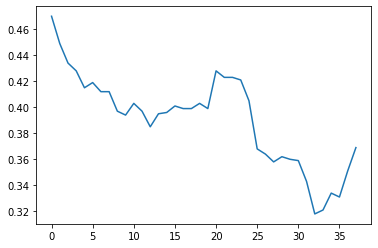

In [19]:
dfej10_3.prepop.plot()


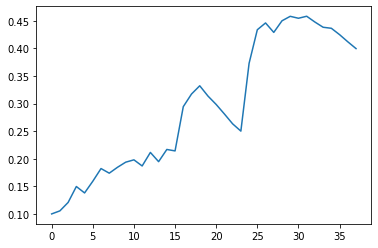

In [21]:
dfej10_3.mincov.plot()

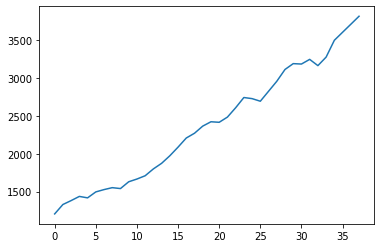

In [20]:
dfej10_3.usgnp.plot()

In [ ]:
# Comentario : la Variable usgnp es la que parece tener una tendencia lineal creciente

In [ ]:
# Entonces agregamos un tendencia a la regresión del Ejemplo 10.3

In [24]:
regdfej10_10 = smf.ols('np.log(prepop) ~  np.log(mincov) + np.log(usgnp) + t ', data = dfej10_3).fit()
print(regdfej10_10.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(prepop)   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     62.78
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           6.01e-14
Time:                        13:45:25   Log-Likelihood:                 72.532
No. Observations:                  38   AIC:                            -137.1
Df Residuals:                      34   BIC:                            -130.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.6963      1.296     -6.

In [25]:
regdfej10_10.params

Intercept        -8.696298
np.log(mincov)   -0.168695
np.log(usgnp)     1.057351
t                -0.032354
dtype: float64

In [32]:
regdfej10_10.pvalues

Intercept         1.042313e-07
np.log(mincov)    5.521031e-04
np.log(usgnp)     8.979790e-07
t                 2.313236e-07
dtype: float64

In [29]:
regdfej10_3.params

Intercept        -1.054423
np.log(mincov)   -0.154444
np.log(usgnp)    -0.012189
dtype: float64

In [31]:
regdfej10_3.pvalues

Intercept         0.177073
np.log(mincov)    0.022910
np.log(usgnp)     0.891262
dtype: float64

In [ ]:
# El coeficiente de usgnp pasa de -0.012 y no significativo a 0.17  y muy significativo
# El coeficiente del salario mínimo (mincov) no cambia tanto pero si se ha vuelto más significativo

In [ ]:
# Para interpretar el efecto de la tendencia vemos que usgnp tiene efectivamente una tendencia lineal, que elimina (t)

In [22]:
regdfej10_10a = smf.ols('np.log(usgnp) ~   + t ', data = dfej10_3).fit()
print(regdfej10_10a.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(usgnp)   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2842.
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           7.48e-36
Time:                        13:22:23   Log-Likelihood:                 70.830
No. Observations:                  38   AIC:                            -137.7
Df Residuals:                      36   BIC:                            -134.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1245      0.013    558.458      0.0

In [ ]:
# Comentario : usgnp está creciendo al 3% anual

In [ ]:
# Comentario : En la regresión de prepop contra usgnp en logaritmos y con tendencia, que elimina la tendencia de usgnp, 
# el coeficiente de 1.0574 de log(usdnp) significa que cuando usgnp aumenta 1% arriba de su tendencia, prepop aumenta 1.0574%

## Ejemplo 10.10 Inversión en vivienda* (hseinv.dta)

In [ ]:
# Calculamos el R2 con la dependiente con tendencia

In [48]:
# En la relación entre invpc y el precio, en logaritmos, incluimos t para evitar regresión espuria
# El R2 en esa regresión es

In [37]:
regdfej10_7c.rsquared

0.3407654273036357

In [ ]:
# Pero eso es engañoso. Para obtener un R2 adecuado primero sacamos la tendencia de log(invpc) y luego hacemos la regresión
# Esa regresión ya estaba en el Ejemplo 10.7
# Obtenemos los residuos y hacemos la regresión

In [39]:
resyt = regdfej10_7a.resid

In [40]:
regdfej10_10 = smf.ols('resyt ~  np.log(price) + t  ', data = dfej10_7).fit()
print(regdfej10_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  resyt   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.1575
Date:                Thu, 23 Jul 2020   Prob (F-statistic):              0.855
Time:                        16:07:56   Log-Likelihood:                 23.459
No. Observations:                  42   AIC:                            -40.92
Df Residuals:                      39   BIC:                            -35.71
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0718      0.136     -0.529

In [ ]:
# El R2 queda en 0.008 y el ajustado es negativo
# Es decir, los movimientos de log(price) alrededor de su tendencia (por la presencia de t, es lo que queda) no explican nada
# del movimiento de log(invpc) alrtededor de su tendencia
# Eso es coherente con el p-value de log(price ) en la regresión original 

In [46]:
np.round(regdfej10_7c.pvalues, 4)

Intercept        0.0000
np.log(price)    0.5779
t                0.0079
dtype: float64

In [ ]:
# Verificamos que la suma de cuadrados residuales de las dos regresiones son iguales

In [49]:
regdfej10_7c.ssr

0.804674926886195

In [50]:
regdfej10_10.ssr

0.8046749268861949

In [ ]:
# Comprobamos el r2 de esa regresión por la fórmula de 1-SCE/suma(resyt^2)

In [58]:
1- (regdfej10_10.ssr) / (regdfej10_7a.ssr)

0.00801078688097101

In [ ]:
# También podemos calcular el R2 ajustado ( que es aporximado??)

In [55]:
1- (regdfej10_10.ssr/(regdfej10_10.nobs-4)) / (regdfej10_7a.ssr/(regdfej10_7a.nobs-2))

-0.044199171704240925

In [53]:
regdfej10_10.rsquared_adj

-0.04286045481744072

In [ ]:
# Estacionalidad

## Ejemplo 10.11 Efectos de las demandas antidumping* (barium.dta)

In [61]:
regdfej10_11 = smf.ols('np.log(chnimp) ~ np.log(chempi) + np.log(gas) + np.log(rtwex) + befile6 + affile6 + afdec6 + feb + mar+ apr+ may+ jun+jul+aug+sep+oct+nov+dec', data = dfej10_5).fit()
print(regdfej10_11.summary())

                            OLS Regression Results                            
Dep. Variable:         np.log(chnimp)   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     3.712
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.28e-05
Time:                        18:09:13   Log-Likelihood:                -109.54
No. Observations:                 131   AIC:                             255.1
Df Residuals:                     113   BIC:                             306.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.7788     32.429      0.

In [ ]:
regdfej10_11.

In [62]:
hypotheses = '(feb = mar = apr = may = jun = jul = aug = sep = oct = nov = dec= 0)'
f_test = regdfej10_11.f_test(hypotheses)
print(f_test)

<F test: F=array([[0.85594329]]), p=0.5852008492913365, df_denom=113, df_num=11>


In [ ]:
# Comentario : La estacionalidad conjunta no es significativa en este modelo